In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Library**

In [57]:
!pip install phik

In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import phik

#**Load The Data**

In [5]:
# import data
df_ori = pd.read_excel('/content/drive/MyDrive/Training Machine Learning/Tugas Akhir/Dataset/Dataset_After_Cleaning.xlsx')

# duplicate data
df = df_ori.copy()

# show df
df

,filler_temperature,filler_bowl_pressure,filler_bowl_level,product_infeed_pressure,co2_supply_pressure,buffer_tank_temperature,head_tank_pressure,gas_volume_product_in_buffer_tank_nami,label
0,19.95,4.56,26.56,5.58,10.11,16.00,4.64,3.31,OK
1,20.24,4.31,39.40,5.59,10.13,15.96,4.67,3.31,OK
2,20.25,4.29,39.62,5.58,10.12,15.96,4.65,3.31,OK
3,20.26,4.30,39.54,5.55,10.12,15.93,4.64,3.31,OK
4,20.98,4.46,30.70,5.14,10.37,16.84,4.48,3.29,OK
...,...,...,...,...,...,...,...,...,...
16529,16.85,4.65,35.27,5.04,9.19,17.32,2.08,3.20,NG
16530,16.87,4.39,31.88,5.01,9.19,17.36,2.08,3.20,NG
16531,17.01,4.70,0.00,1.70,1.79,25.85,1.21,0.00,NG
16532,17.01,0.88,0.00,1.81,1.78,26.57,1.08,0.00,NG


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   filler_temperature                      16534 non-null  float64
 1   filler_bowl_pressure                    16534 non-null  float64
 2   filler_bowl_level                       16534 non-null  float64
 3   product_infeed_pressure                 16534 non-null  float64
 4   co2_supply_pressure                     16534 non-null  float64
 5   buffer_tank_temperature                 16534 non-null  float64
 6   head_tank_pressure                      16534 non-null  float64
 7   gas_volume_product_in_buffer_tank_nami  16534 non-null  float64
 8   label                                   16534 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [7]:
df.describe()

,filler_temperature,filler_bowl_pressure,filler_bowl_level,product_infeed_pressure,co2_supply_pressure,buffer_tank_temperature,head_tank_pressure,gas_volume_product_in_buffer_tank_nami
count,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000
mean,17.363222,4.404775,30.383276,5.182964,9.993999,16.271963,4.304688,3.192778
std,1.006891,0.161522,4.164438,0.301643,0.443594,1.155978,0.304626,0.214900
min,15.670000,-0.140000,0.000000,-0.470000,0.140000,14.490000,0.370000,0.000000
25%,16.570000,4.350000,29.570000,5.060000,10.010000,15.420000,4.200000,3.200000
50%,17.560000,4.400000,29.920000,5.150000,10.040000,16.480000,4.280000,3.200000
75%,18.050000,4.440000,30.360000,5.320000,10.060000,17.000000,4.450000,3.210000
max,55.470000,5.080000,293.500000,7.170000,10.440000,67.080000,4.790000,3.310000


In [8]:
df.isnull().sum()

,0
filler_temperature,0
filler_bowl_pressure,0
filler_bowl_level,0
product_infeed_pressure,0
co2_supply_pressure,0
buffer_tank_temperature,0
head_tank_pressure,0
gas_volume_product_in_buffer_tank_nami,0
label,0


#**Visualization**

###Distribusi Label

In [17]:
print("Distribusi Label:")
print(df['label'].value_counts())

Distribusi Label:
label
OK    14998
NG     1536
Name: count, dtype: int64


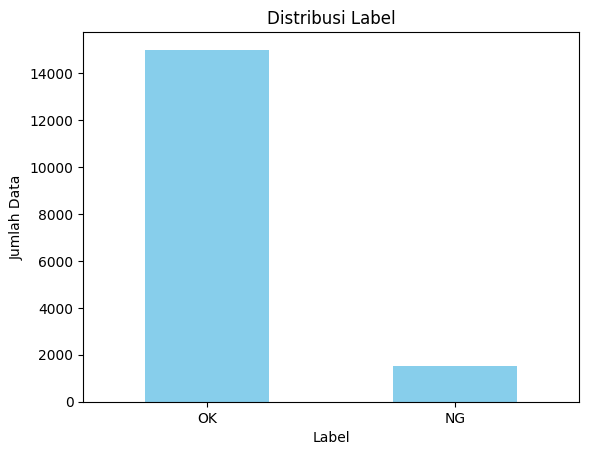

In [18]:
# Distribusi label
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Label")
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=0)
plt.show()

###Distribusi Setiap Fitur Berdasarkan Label

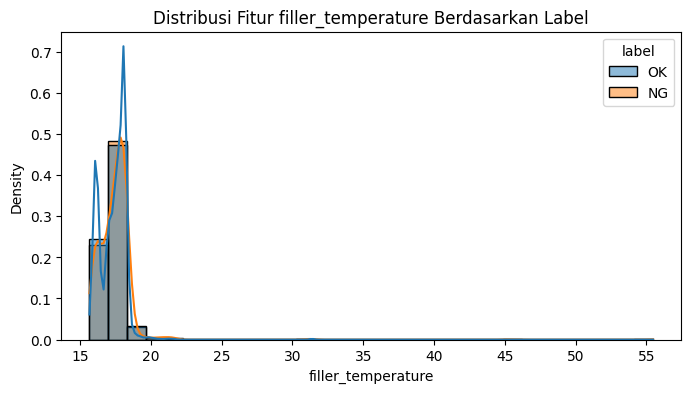

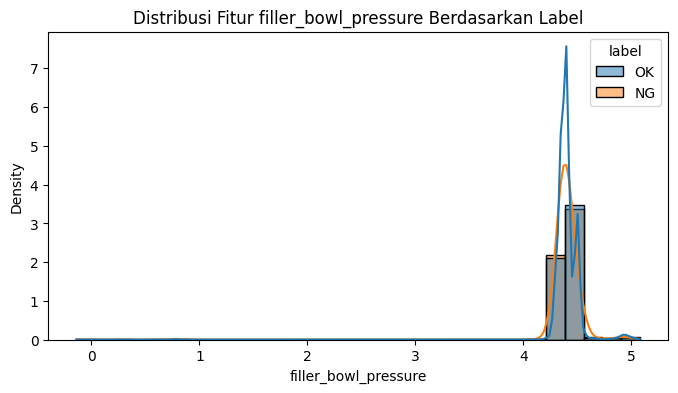

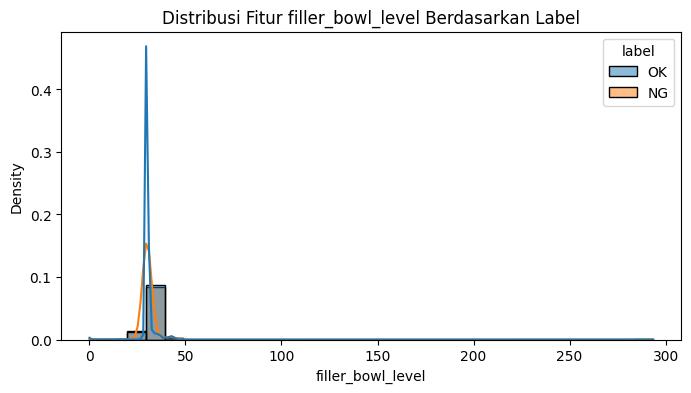

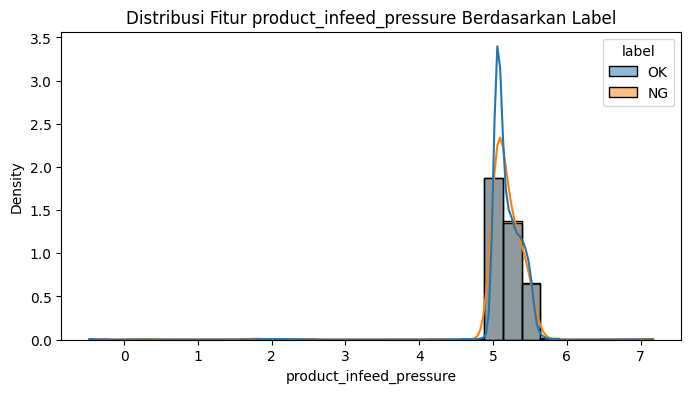

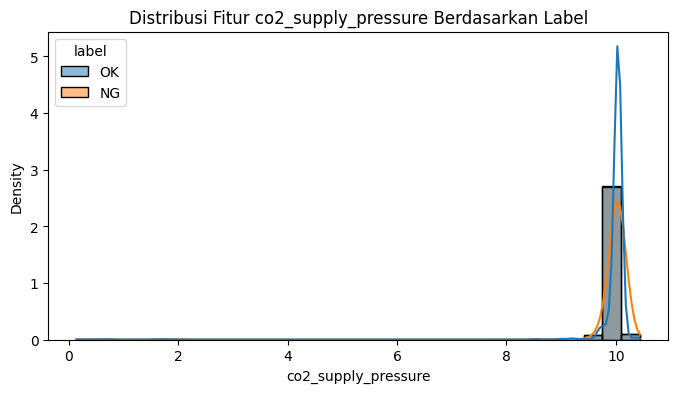

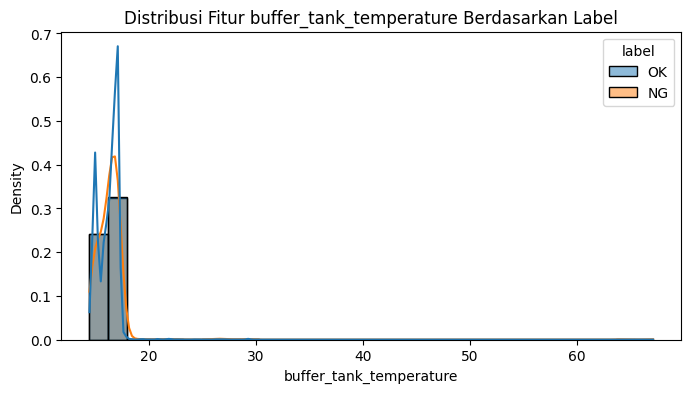

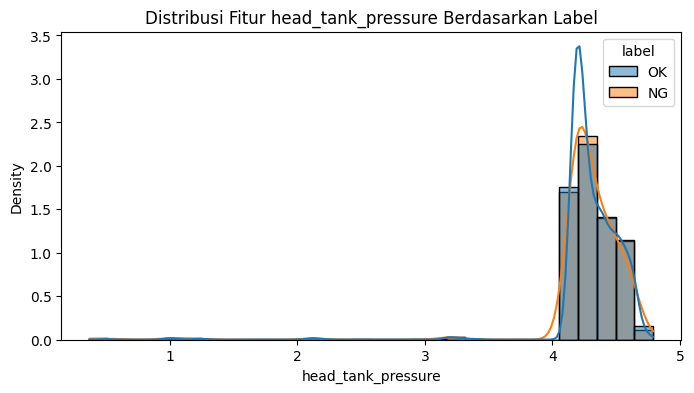

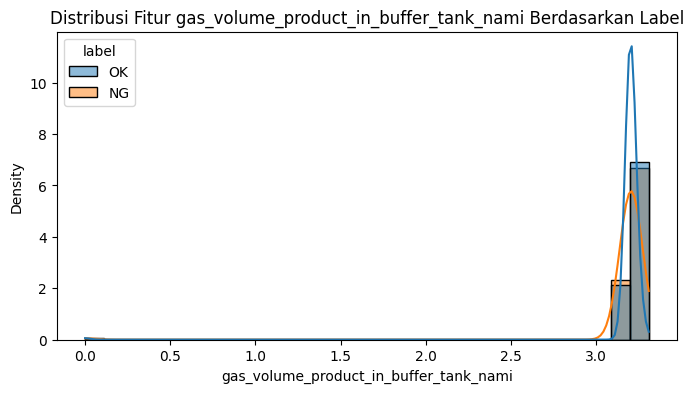

In [19]:
# Visualisasi distribusi setiap fitur berdasarkan label
for col in df.columns[:-1]:  # Asumsi kolom terakhir adalah label
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='label', kde=True, stat='density', common_norm=False, bins=30, palette='tab10')
    plt.title(f'Distribusi Fitur {col} Berdasarkan Label')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

###Melihat hubungan antara tiap fitur dengan warna berdasarkan label

<ipython-input-29-6436bfcd24e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='label', y=feature, palette='tab10', alpha=0.7, jitter=True, ax=axes[i])
<ipython-input-29-6436bfcd24e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='label', y=feature, palette='tab10', alpha=0.7, jitter=True, ax=axes[i])
<ipython-input-29-6436bfcd24e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='label', y=feature, palette='tab10', alpha=0.7, jitter=True, ax=axes[i])
<ipython-input-29-6436bfcd24e6>:10: FutureW

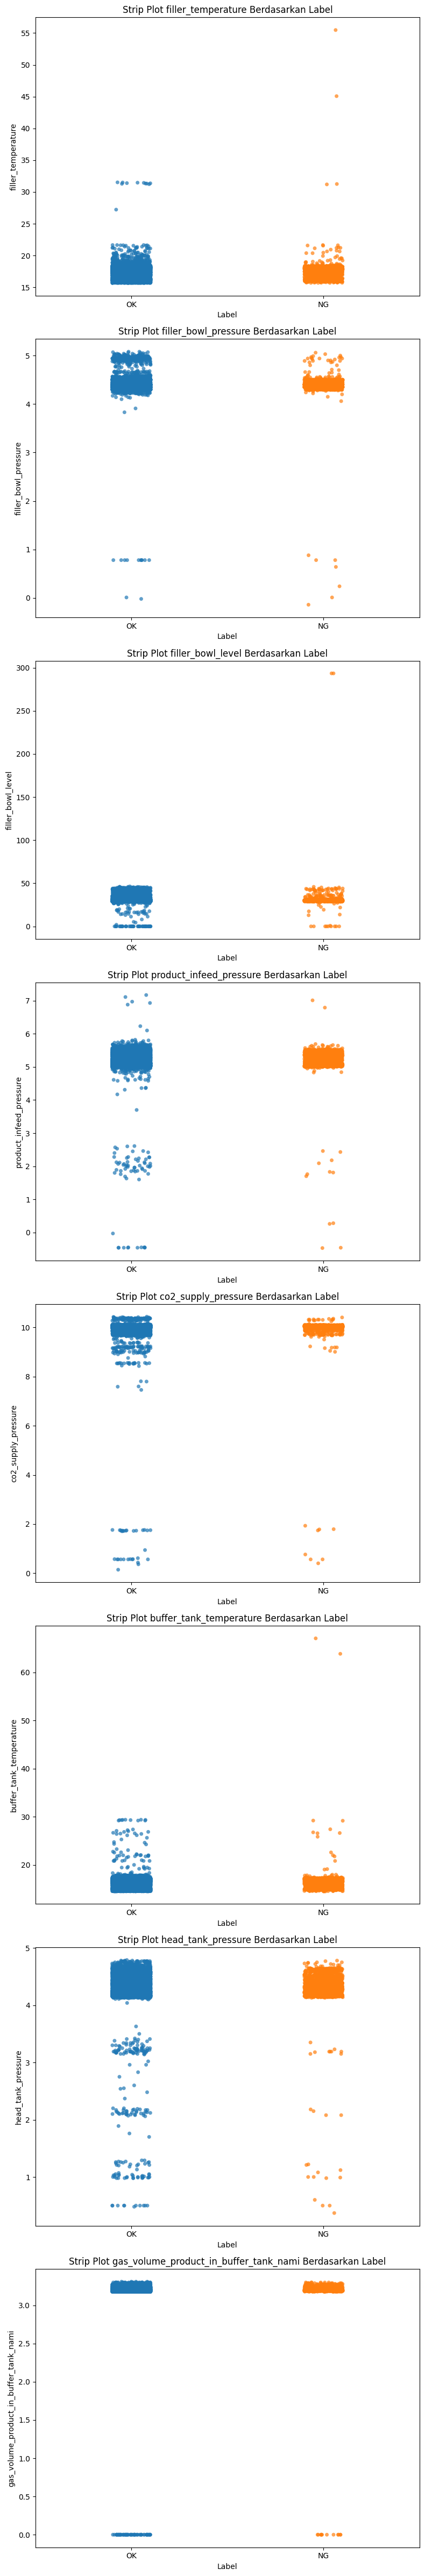

In [29]:
features_to_plot = df.columns[:-1]  # Asumsi kolom terakhir adalah 'label'

# Tentukan ukuran figure berdasarkan jumlah fitur
n_features = len(features_to_plot)
fig, axes = plt.subplots(n_features, 1, figsize=(8, 6 * n_features), sharex=False)

# Plot setiap fitur
for i, feature in enumerate(features_to_plot):
    sns.stripplot(data=df, x='label', y=feature, palette='tab10', alpha=0.7, jitter=True, ax=axes[i])
    axes[i].set_title(f'Strip Plot {feature} Berdasarkan Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

<ipython-input-33-194de6b9c538>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
<ipython-input-33-194de6b9c538>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
<ipython-input-33-194de6b9c538>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
<ipython-input-33-194de6b9c538>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

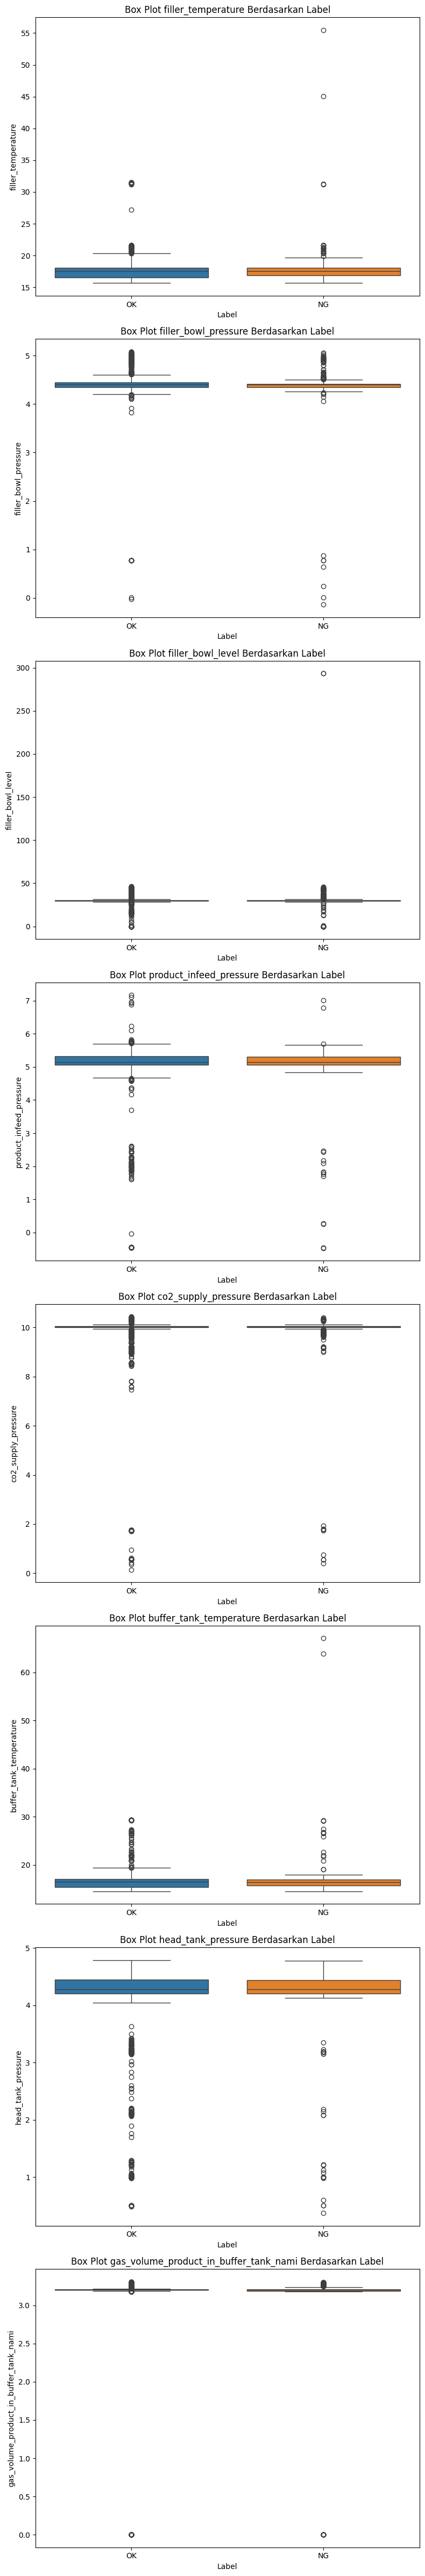

In [33]:
features_to_plot = df.columns[:-1]  # Asumsi kolom terakhir adalah 'label'

# Tentukan ukuran figure berdasarkan jumlah fitur
n_features = len(features_to_plot)
fig, axes = plt.subplots(n_features, 1, figsize=(8, 6 * n_features), sharex=False)

# Plot setiap fitur
for i, feature in enumerate(features_to_plot):
    sns.boxplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
    axes[i].set_title(f'Box Plot {feature} Berdasarkan Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

<ipython-input-34-4c23c53c67b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
<ipython-input-34-4c23c53c67b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
<ipython-input-34-4c23c53c67b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
<ipython-input-34-4c23c53c67b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

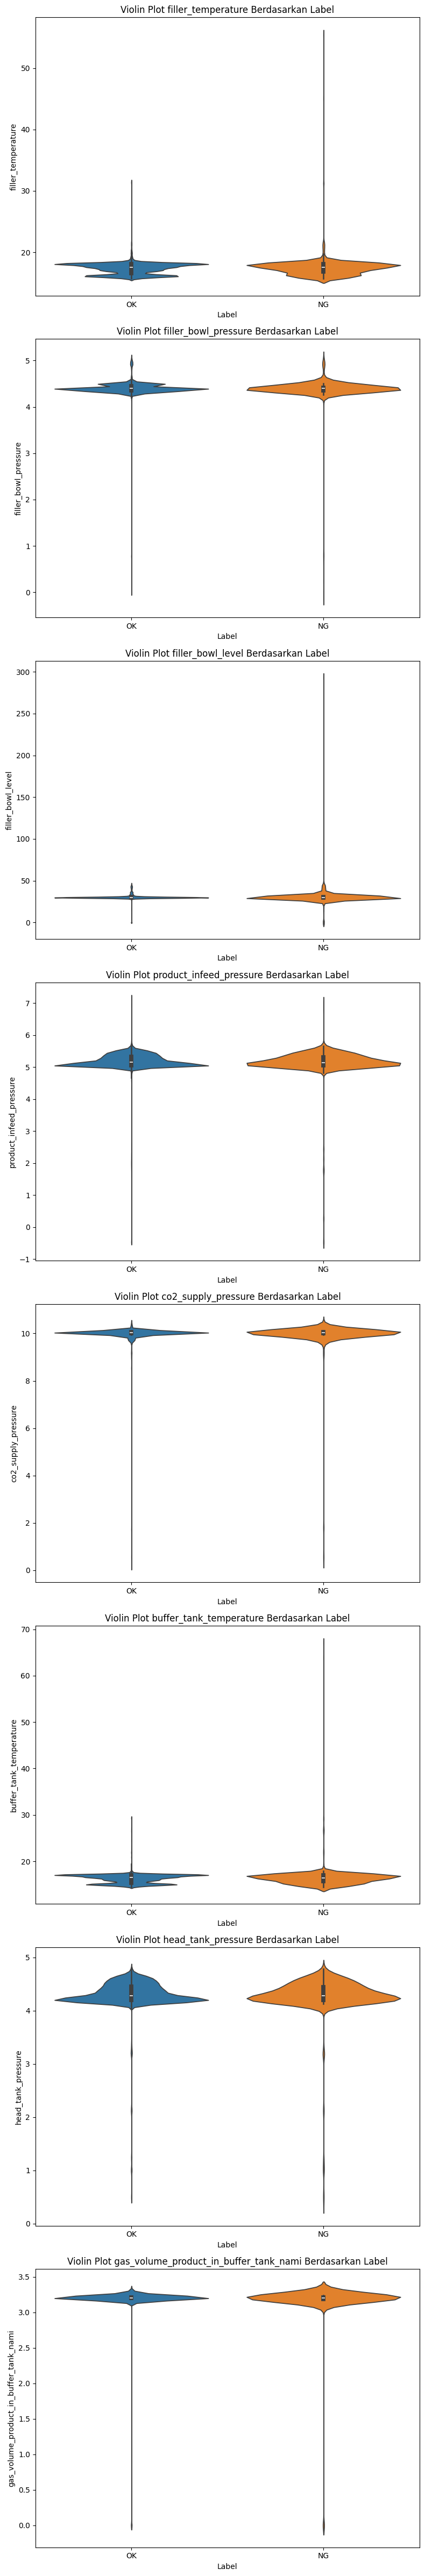

In [34]:
features_to_plot = df.columns[:-1]  # Asumsi kolom terakhir adalah 'label'

# Tentukan ukuran figure berdasarkan jumlah fitur
n_features = len(features_to_plot)
fig, axes = plt.subplots(n_features, 1, figsize=(8, 6 * n_features), sharex=False)

# Plot setiap fitur
for i, feature in enumerate(features_to_plot):
    sns.violinplot(data=df, x='label', y=feature, palette='tab10', ax=axes[i])
    axes[i].set_title(f'Violin Plot {feature} Berdasarkan Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

###Melihat hubungan antara dua fitur dengan warna berdasarkan label

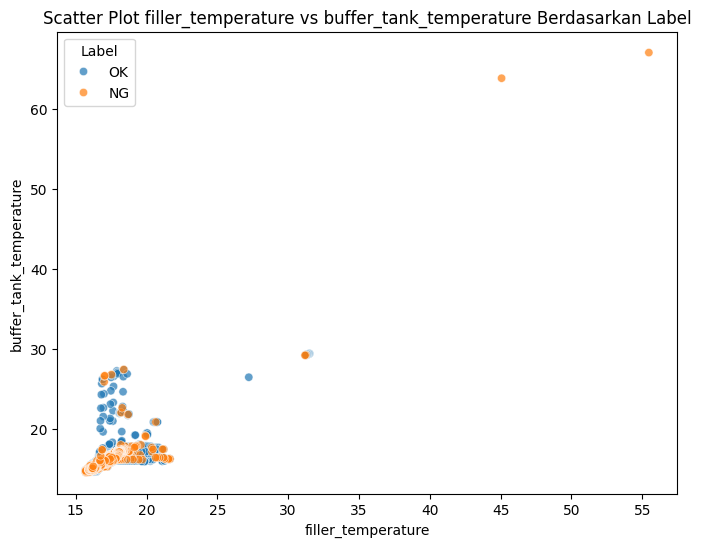

In [30]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='filler_temperature', y='buffer_tank_temperature', hue='label', palette='tab10', alpha=0.7)
plt.title('Scatter Plot filler_temperature vs buffer_tank_temperature Berdasarkan Label')
plt.xlabel('filler_temperature')
plt.ylabel('buffer_tank_temperature')
plt.legend(title='Label')
plt.show()

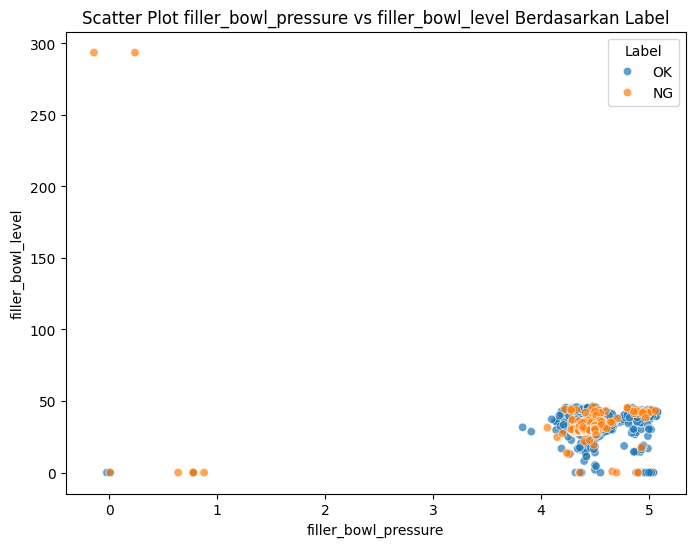

In [31]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='filler_bowl_pressure', y='filler_bowl_level', hue='label', palette='tab10', alpha=0.7)
plt.title('Scatter Plot filler_bowl_pressure vs filler_bowl_level Berdasarkan Label')
plt.xlabel('filler_bowl_pressure')
plt.ylabel('filler_bowl_level')
plt.legend(title='Label')
plt.show()

#**PCA (Principal Component Analysis)**

Memplot semua fitur sekaligus untuk setiap label

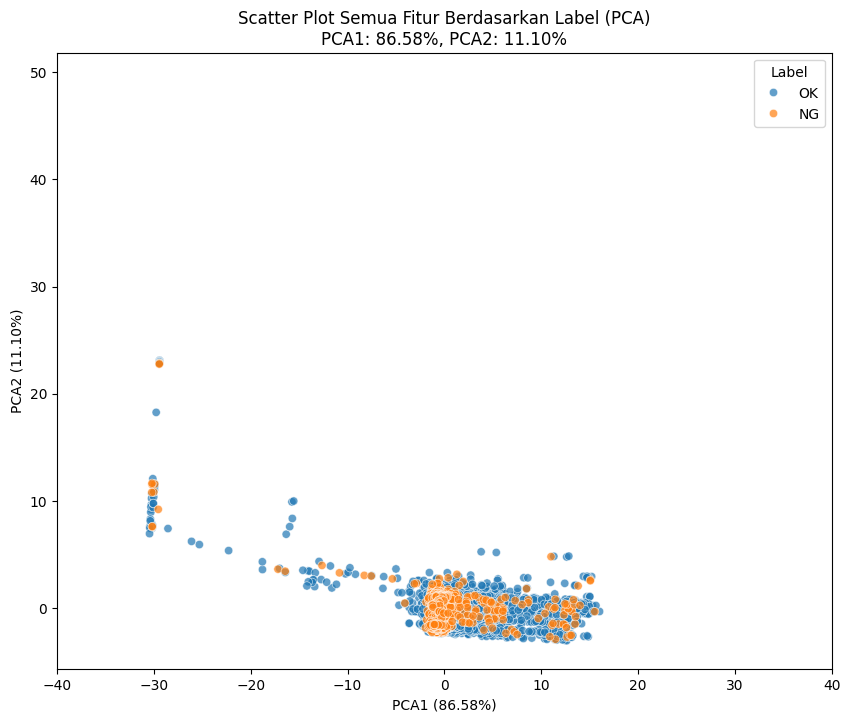

In [40]:
# Reduksi dimensi menjadi 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Hitung persentase kontribusi variansi untuk setiap komponen
explained_variance = pca.explained_variance_ratio_ * 100

# Buat DataFrame hasil PCA untuk visualisasi
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['label'] = y

# Plot hasil PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='tab10', alpha=0.7)
plt.title(f'Scatter Plot Semua Fitur Berdasarkan Label (PCA)\n'
          f'PCA1: {explained_variance[0]:.2f}%, PCA2: {explained_variance[1]:.2f}%')
plt.xlabel(f'PCA1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PCA2 ({explained_variance[1]:.2f}%)')
plt.xlim(-40, 40)  # Batasi rentang sumbu X dari -50 hingga 50
plt.legend(title='Label')
plt.show()

**Kesimpulan: Distribusi data per label --> Tumpang tindih**

#**Korelasi**

In [60]:
concat = pd.concat([X, y], axis=1) #menggabungkan data X & y

# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Define the list of columns for each subset
columns = ['filler_temperature', 'filler_bowl_pressure', 'filler_bowl_level',
       'product_infeed_pressure', 'co2_supply_pressure',
       'buffer_tank_temperature', 'head_tank_pressure',
       'gas_volume_product_in_buffer_tank_nami', 'label']
target = ['label']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat, columns, target)

# Print result
print(correlation)

interval columns not set, guessing: ['filler_temperature', 'filler_bowl_pressure', 'filler_bowl_level', 'product_infeed_pressure', 'co2_supply_pressure', 'buffer_tank_temperature', 'head_tank_pressure', 'gas_volume_product_in_buffer_tank_nami']
                                           label
filler_temperature                      0.051249
filler_bowl_pressure                    0.026853
filler_bowl_level                       0.023584
product_infeed_pressure                 0.023505
co2_supply_pressure                     0.013883
buffer_tank_temperature                 0.055944
head_tank_pressure                      0.011217
gas_volume_product_in_buffer_tank_nami  0.019107
label                                   1.000000


<ipython-input-61-8d3909a7737d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Phi-K Correlation', y='Feature', palette='coolwarm')


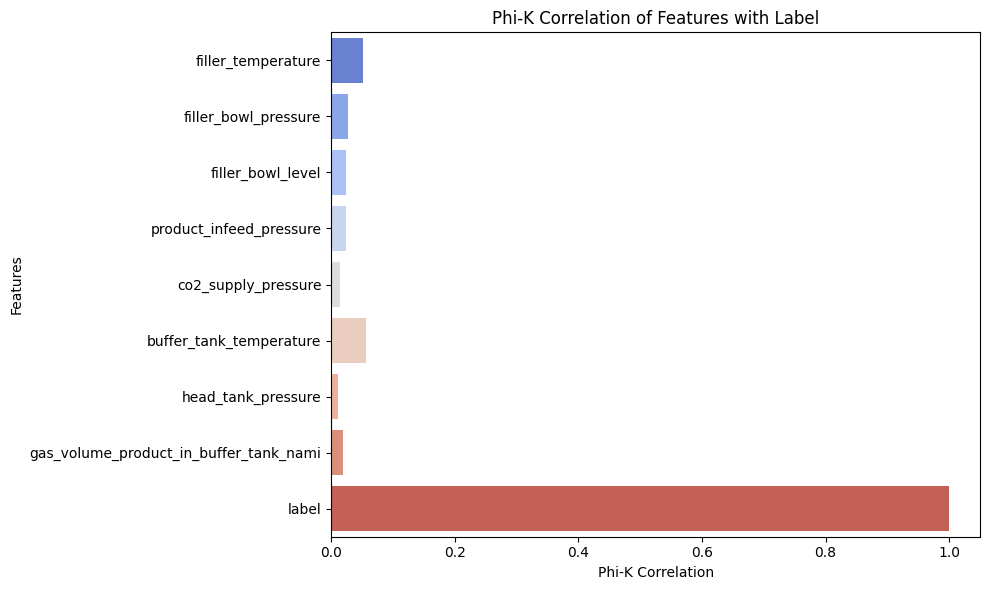

In [61]:
# 'correlation' adalah hasil compute_phik_correlation
# Konversi hasil ke DataFrame jika berbentuk Series
correlation_df = correlation.reset_index()
correlation_df.columns = ['Feature', 'Phi-K Correlation']

# Visualisasi Phi-K Correlation menggunakan barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Phi-K Correlation', y='Feature', palette='coolwarm')
plt.title('Phi-K Correlation of Features with Label')
plt.xlabel('Phi-K Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

interval columns not set, guessing: ['filler_temperature', 'filler_bowl_pressure', 'filler_bowl_level', 'product_infeed_pressure', 'co2_supply_pressure', 'buffer_tank_temperature', 'head_tank_pressure', 'gas_volume_product_in_buffer_tank_nami']


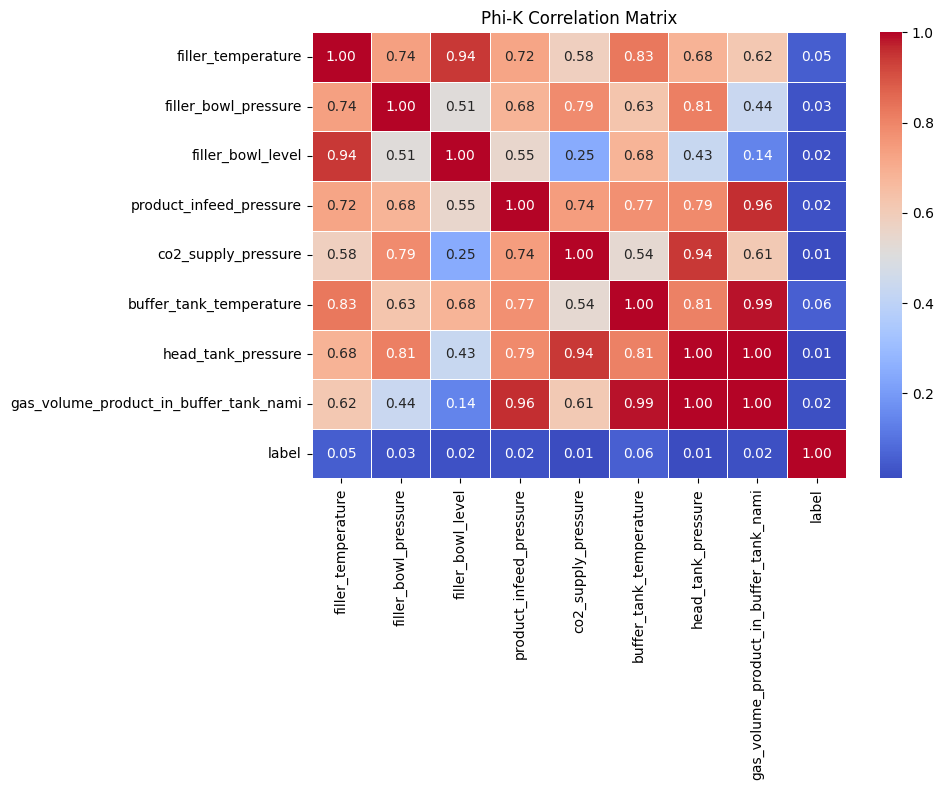

In [62]:
# Compute full correlation matrix including 'label'
correlation_matrix = concat.phik_matrix()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Phi-K Correlation Matrix")
plt.tight_layout()
plt.show()

**Kesimpulan: 2 fitur dengan korelasi tertinggi yaitu buffer_tank_temperature (0.06) & filler_temperature (0.05)**

##Cara Lain

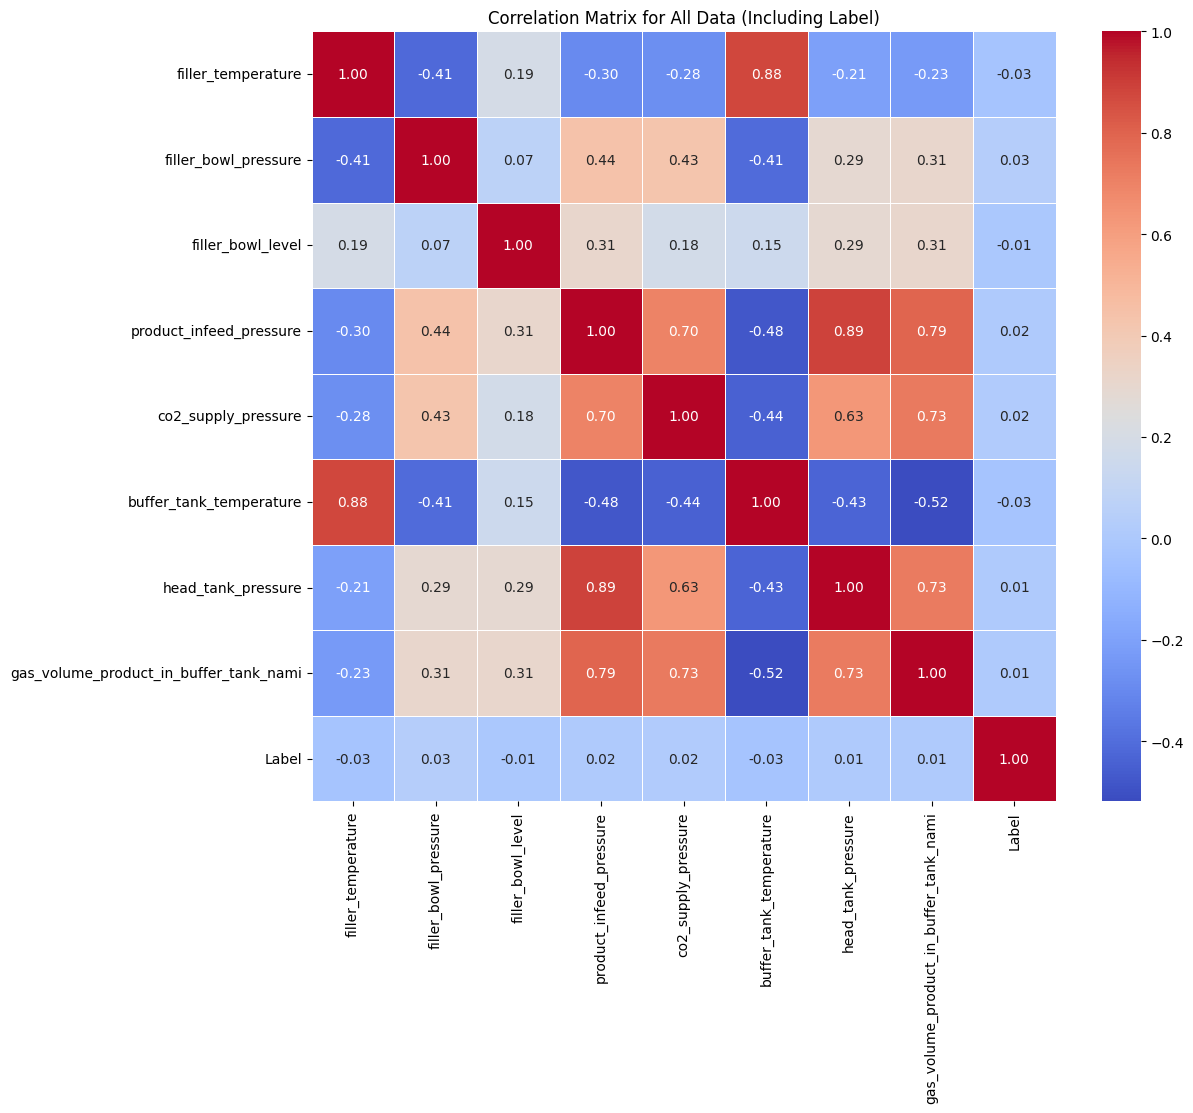

In [52]:
# df_full = pd.DataFrame(X, columns=['filler_temperature', 'filler_bowl_pressure', 'filler_bowl_level',
#                                    'product_infeed_pressure', 'co2_supply_pressure', 'buffer_tank_temperature',
#                                    'head_tank_pressure', 'gas_volume_product_in_buffer_tank_nami'])

# df_full['Label'] = y  # Menambahkan kolom 'Label'

# Konversi label ke format numerik (0, 1 untuk 'NG', 'OK')
label_encoder = LabelEncoder()
df_full['Label'] = label_encoder.fit_transform(df_full['Label'])

# Hitung korelasi untuk seluruh data (termasuk label yang sudah numerik)
correlation_full = df_full.corr()
#print("Correlation Matrix for All Data (Including Label):")
#print(correlation_full)

# Plot korelasi untuk seluruh data (termasuk label yang sudah numerik)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_full, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for All Data (Including Label)")
plt.show()

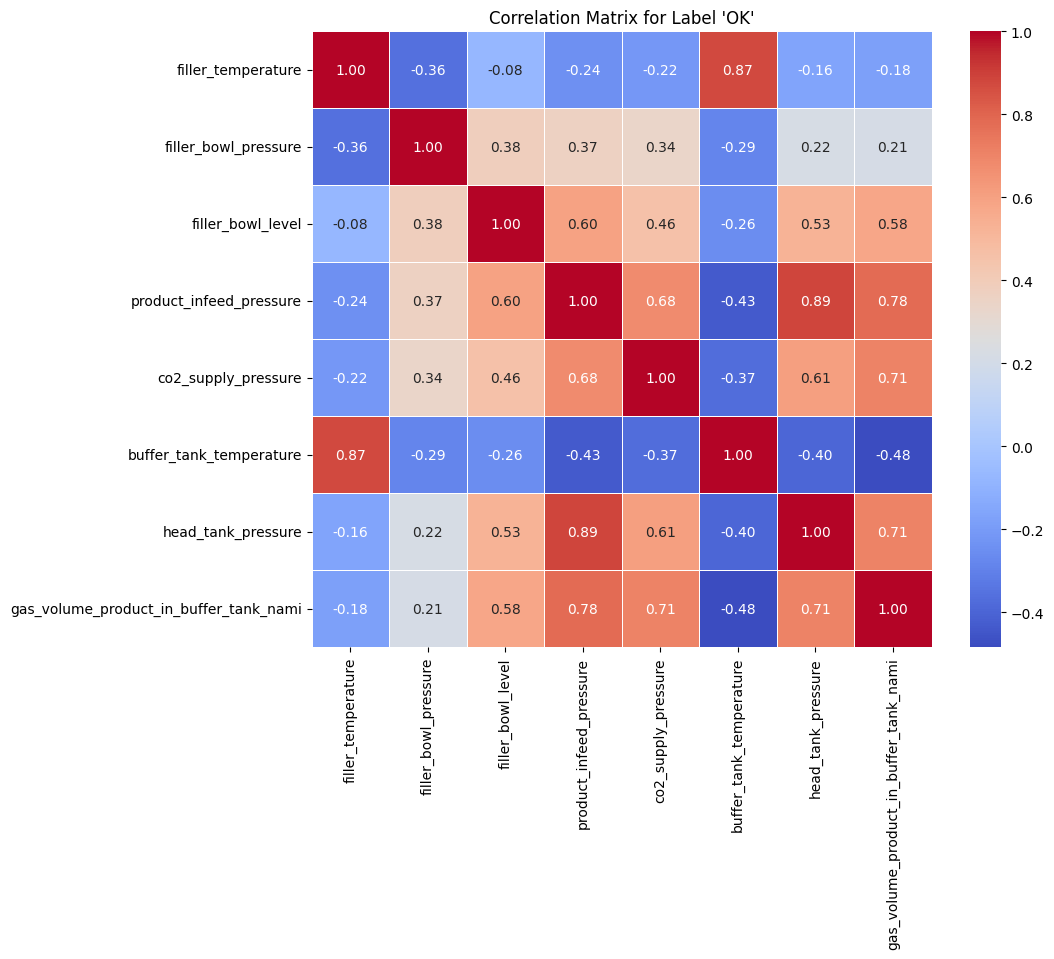

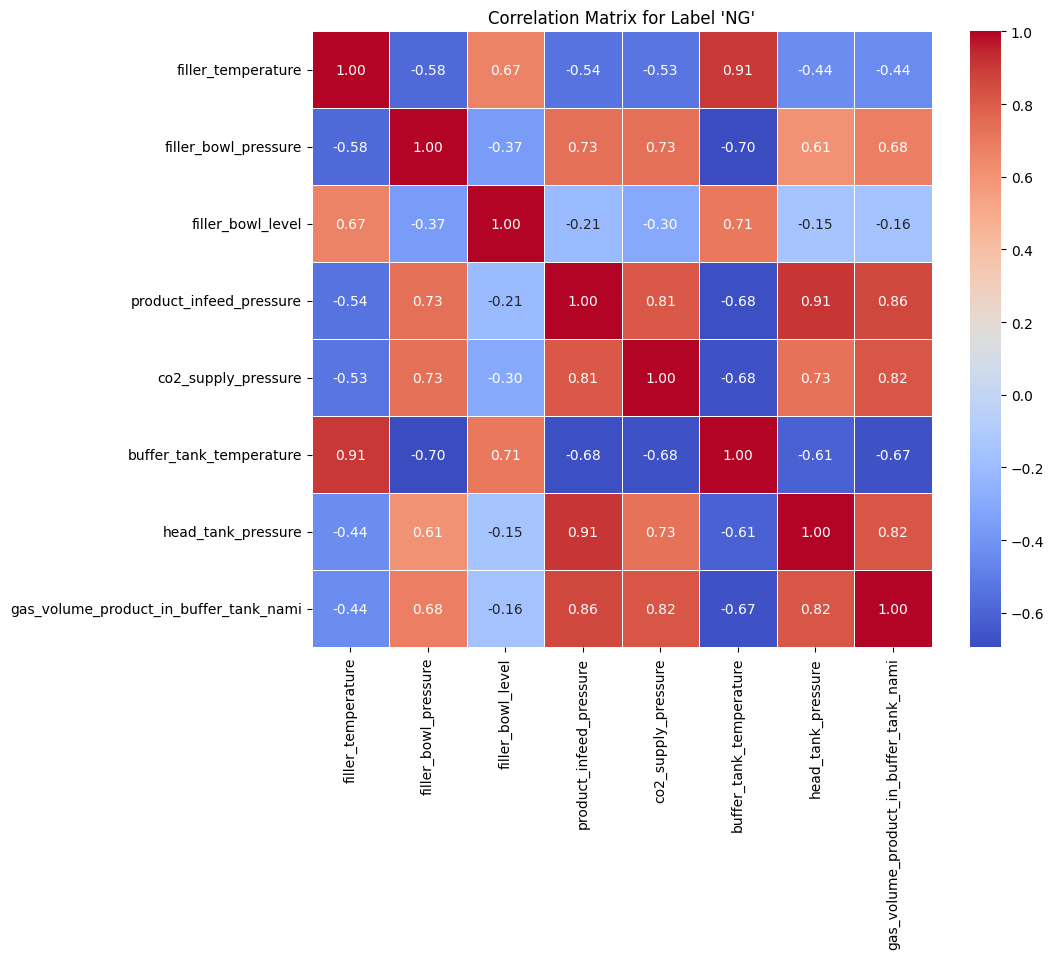

In [50]:
# df_full = pd.DataFrame(X, columns=['filler_temperature', 'filler_bowl_pressure', 'filler_bowl_level',
#                                    'product_infeed_pressure', 'co2_supply_pressure', 'buffer_tank_temperature',
#                                    'head_tank_pressure', 'gas_volume_product_in_buffer_tank_nami'])

# Pastikan df_full memiliki kolom 'Label' yang berisi nilai kategori ('OK', 'NG')
df_full['Label'] = y  # Misalnya y adalah label asli yang sudah Anda miliki

# Korelasi untuk data label OK
df_ok = df_full[df_full['Label'] == 'OK']
correlation_ok = df_ok.drop(columns='Label').corr()
#print("Correlation Matrix for Label 'OK':")
#print(correlation_ok)

# Korelasi untuk data label NG
df_ng = df_full[df_full['Label'] == 'NG']
correlation_ng = df_ng.drop(columns='Label').corr()
#print("Correlation Matrix for Label 'NG':")
#print(correlation_ng)

# Plot korelasi untuk data label 'OK'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_ok, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Label 'OK'")
plt.show()

# Plot korelasi untuk data label 'NG'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_ng, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Label 'NG'")
plt.show()
